<a href="https://colab.research.google.com/github/Vishaal-batcoderda/Book-Recommendation-Using-KNN/blob/main/Book_Recommendation_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2025-07-20 13:41:18--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.2’

book-crossings.zip. 100%[===================>]  24.88M  --.-KB/s    in 0.1s    

2025-07-20 13:41:18 (243 MB/s) - ‘book-crossings.zip.2’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

Active user ratings: 

 Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       188951,   9856, 155916, 268622, 225595,  36554,  83671, 252827,  26883,
        99955],
      dtype='int32', name='user', length=905) 



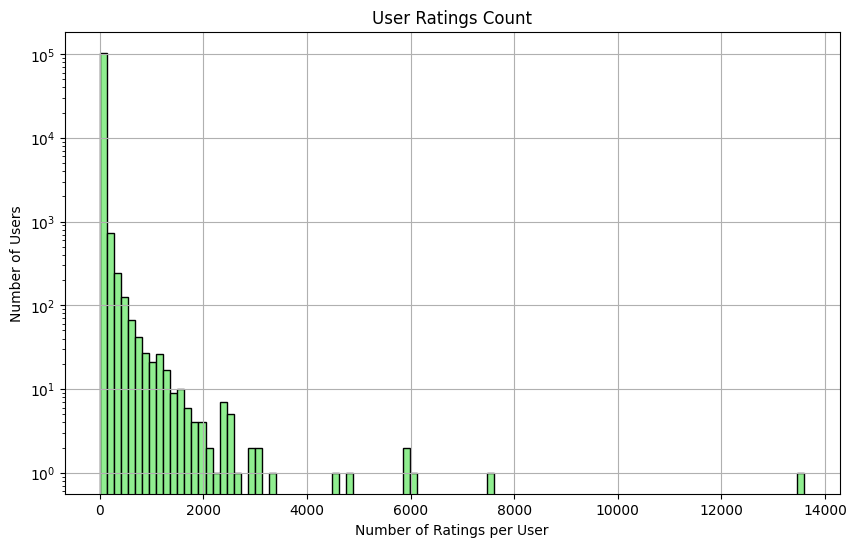

ISBN Indices: 

 Index(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516',
       '044023722X', '0679781587', '0142001740', '067976402X', '0671027360',
       ...
       '0449203794', '0140092323', '0312966806', '0385424736', '0425189864',
       '067100042X', '0425151867', '0425136981', '0786866586', '0060916508'],
      dtype='object', name='isbn', length=731) 



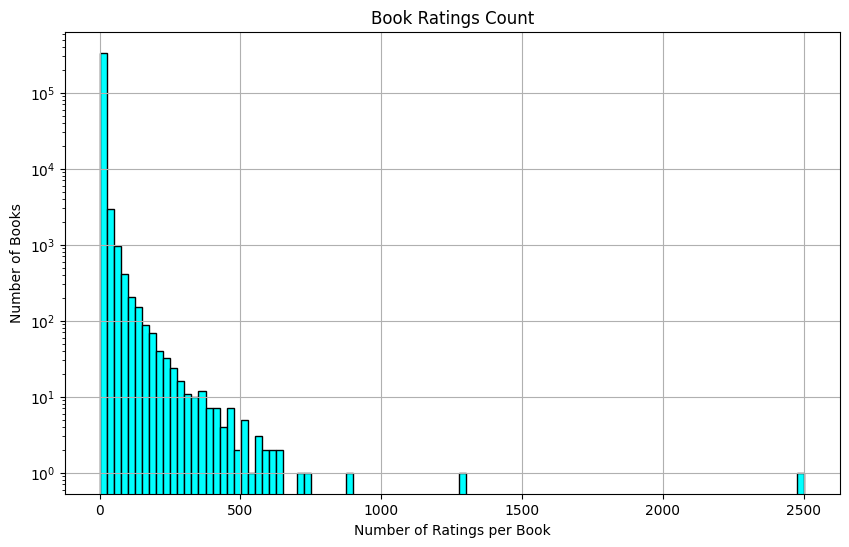

In [ ]:
# add your code here - consider creating a new cell for each section of code

# Gets indices of only users with 200 or more ratings
user_counts = df_ratings['user'].value_counts()
active_users = user_counts[user_counts >= 200].index
print("Active user ratings: \n\n",active_users,"\n")

# To visualize the distribution of no. of users and their ratings
plt.figure(figsize=(10, 6))
plt.hist(user_counts, bins=100, color='lightgreen', edgecolor='black')
plt.title('User Ratings Count')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.grid(True)
plt.show()

# Gets indices of only books with 100 or more ratings
book_counts = df_ratings['isbn'].value_counts()
popular_books = book_counts[book_counts >= 100].index
print("ISBN Indices: \n\n",popular_books,"\n")

# To visualize the distribution of no. of books and it's ratings
plt.figure(figsize=(10, 6))
plt.hist(book_counts, bins=100, color='cyan', edgecolor='black')
plt.title('Book Ratings Count')
plt.xlabel('Number of Ratings per Book')
plt.ylabel('Number of Books')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
# Fetches and creates dataset with modifications done
filtered_ratings = df_ratings[
    df_ratings['user'].isin(active_users) &
    df_ratings['isbn'].isin(popular_books)
]
print("Cleaned datset: \n\n",filtered_ratings.head())

Cleaned datset: 

         user        isbn  rating
1456  277427  002542730X    10.0
1469  277427  0060930535     0.0
1471  277427  0060934417     0.0
1474  277427  0061009059     9.0
1484  277427  0140067477     0.0


In [ ]:
# Creates a matrix like pivot table with isbn as 'rows' and 'user' as columns
book_temp_matrix = filtered_ratings.pivot_table(index='isbn',columns='user',values='rating')
book_temp_matrix = book_temp_matrix.fillna(0)
book_user = csr_matrix(book_temp_matrix.values)
print("CSR matrix: \n\n",book_user)

CSR matrix: 

 <Compressed Sparse Row sparse matrix of dtype 'float32'
	with 12640 stored elements and shape (731, 888)>
  Coords	Values
  (0, 25)	6.0
  (0, 27)	10.0
  (0, 122)	7.0
  (0, 148)	10.0
  (0, 198)	6.0
  (0, 220)	7.0
  (0, 242)	7.0
  (0, 328)	6.0
  (0, 335)	5.0
  (0, 386)	8.0
  (0, 467)	8.0
  (0, 504)	8.0
  (0, 540)	7.0
  (0, 546)	5.0
  (0, 577)	10.0
  (0, 650)	7.0
  (0, 653)	9.0
  (0, 702)	7.0
  (0, 719)	7.0
  (0, 733)	7.0
  (0, 867)	7.0
  (0, 884)	10.0
  (1, 25)	8.0
  (1, 398)	8.0
  (1, 408)	7.0
  :	:
  (729, 197)	8.0
  (729, 239)	8.0
  (729, 266)	8.0
  (729, 390)	8.0
  (729, 397)	9.0
  (729, 457)	7.0
  (729, 489)	10.0
  (729, 535)	8.0
  (729, 567)	10.0
  (729, 657)	8.0
  (729, 796)	8.0
  (729, 798)	10.0
  (729, 875)	10.0
  (730, 107)	10.0
  (730, 115)	8.0
  (730, 132)	6.0
  (730, 284)	10.0
  (730, 308)	2.0
  (730, 373)	10.0
  (730, 458)	7.0
  (730, 488)	8.0
  (730, 501)	3.0
  (730, 563)	10.0
  (730, 675)	3.0
  (730, 861)	7.0


In [ ]:
# Builds a knn model with cosine similarity and fits the matrix
model = NearestNeighbors(metric='cosine',algorithm='brute')
model.fit(book_user)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# function to return recommended books - this will be tested

# Function returns 5 book recommendations based on cosine similarity of rating patterns

def get_recommends(book = ""):
    isbn = df_books[df_books['title'] == book]['isbn'].values[0]
    idx = book_temp_matrix.index.get_loc(isbn)

    # Gets distances and indices of 6 nearest books, including the given book itself
    distances, indices = model.kneighbors(book_user[idx], n_neighbors=6)
    recommendations = []

    # Skip the first neighbor (which is the book itself)
    for i in range(1, len(indices[0])):
        neighbor_idx = indices[0][i]
        neighbor_isbn = book_temp_matrix.index[neighbor_idx]

        # Get the book title from its ISBN
        title = df_books[df_books['isbn'] == neighbor_isbn]['title'].values[0]
        dist = distances[0][i]
        recommendations.append([title, dist])

    recommendations.sort(key=lambda x: x[1], reverse=True) # Recommendations are sorted in descending order
    recommended_books = [book, recommendations]
    return recommended_books

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", np.float32(0.8016211)], ['The Weight of Water', np.float32(0.77085835)], ['The Surgeon', np.float32(0.7699411)], ['I Know This Much Is True', np.float32(0.7677075)], ['The Lovely Bones: A Novel', np.float32(0.7234864)]]]
You passed the challenge! 🎉🎉🎉🎉🎉
